<a href="https://colab.research.google.com/github/vinayakShenoy/DL4CV/blob/master/Code/Learning_rate_schedulers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dropping the Learning Rate
- By adjusting our learning rate on an epoch-to-epoch basis, we can reduce loss increase accuracy, and even in certain situations reduce the total amount of time it takes to train a network.
- We can view the process of learning rate scheduling as:
  - Finding a set of reasoning good weights early in the training process with a higher learning rate.
  - Tuning these weights later in the process to find more optimal weights using a smaller learning rate
- Two primary types of learning rate schedulers:
  - Learning rate schedulers that decrease gradually based on epoch number (linear, exponential, or polynomial)
  - Learning rate schedulers that drop based on specific epoch.

## Standard Decay Schedule in Keras
- We initialize SGD optimizer wiwth a learning rate of $\alpha = 0.01$, a momentum $\gamma=0.9$ and indicate that we are using Nesterov accelerated gradient. 
We then set our decay to be learning rate divided by total number of epochs.
- Keras applies the learning rate schedule to adjust the learning rate after every batch update. 
- If batch_size=64 and number of images=1024, in one epoch we have 16 batches. Thus learning rate will be adjusted 16 times.
- The update formula is:
$$
lr = init\_lr * (1.0/(1.0+decay*iterations))
$$

## Step based decay
- Systematically drop the learning rate after specific epochs during training. 
- It can apply it in two ways:
  - Define a equation that models the piecewise drop in learning rate we wish to achieve.
  - Use ctrl+x method to stop the script when validation performance has stalled, adjust our learning rate and continue training.
- Learning is dropped by half at every step, or in an order of magnitude after every fixed number of epochs.

## Implementing Custom Learning Rate Schedules in Keras.
- Keras library provides a LearningRateScheduler class that allows us to define a custom learning rate function and then have it automatically applied during the training process.
- The below equation, we define a peicewise function that will drop the learning rate by certain factor F after every D epochs:
$$
\alpha_{E+1} = \alpha_l \times F^{(1+E)/D}
$$
where $\alpha_l$ is our initial learning rate, $F$ is the factor value controlling th rate in which the learning rate drops, $D$ is the "drop every" epochs value, and $E$ is the current epoch
- In python code
$$
alpha = initAlpha*(factor**(np.floor((1+epoch)/dropEvery)
$$

In [1]:
!git clone https://github.com/vinayakShenoy/DL4CV
!pip install import_ipynb
%cd DL4CV/Code

Cloning into 'DL4CV'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 37 (delta 8), reused 16 (delta 1), pack-reused 0
Unpacking objects: 100% (37/37), done.
  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=d8b1a5bd30a122fd0169b8616cde1811d532f87893eb97ca3e042e99b39bc928
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb
/content/DL4CV/Code


In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import import_ipynb
from  MiniVGGNet import MiniVGGNet
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

importing Jupyter notebook from MiniVGGNet.ipynb


In [3]:
def step_decay(epoch):
  initAlpha = 0.01
  factor = 0.25
  dropEvery = 5

  alpha = initAlpha*(factor**np.floor((1+epoch)/dropEvery))
  return float(alpha)

In [4]:
print("INFO loading CIFAR-10 data")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float")/255.0
testX = testX.astype("float")/255.0

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

labelNames = labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse",
                           "ship", "truck"]

INFO loading CIFAR-10 data
170500096/170498071 [==============================] - 4s 0us/step


In [5]:
callbacks = [LearningRateScheduler(step_decay)]

opt = SGD(lr=0.01, momentum=0.9, nesterov=True)
model = MiniVGGNet.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,
              metrics=["accuracy"])

H = model.fit(trainX, trainY, validation_data=(testX, testY),
              batch_size=64, epochs=40, callbacks=callbacks, verbose=1)

Epoch 1/40
782/782 [==============================] - 6s 7ms/step - loss: 1.6895 - accuracy: 0.4372 - val_loss: 1.4296 - val_accuracy: 0.5088
Epoch 2/40
782/782 [==============================] - 5s 7ms/step - loss: 1.2218 - accuracy: 0.5789 - val_loss: 1.1108 - val_accuracy: 0.6137
Epoch 3/40
782/782 [==============================] - 5s 7ms/step - loss: 1.0136 - accuracy: 0.6489 - val_loss: 0.8660 - val_accuracy: 0.6990
Epoch 4/40
782/782 [==============================] - 5s 7ms/step - loss: 0.8892 - accuracy: 0.6906 - val_loss: 0.9595 - val_accuracy: 0.6653
Epoch 5/40
782/782 [==============================] - 5s 7ms/step - loss: 0.7391 - accuracy: 0.7389 - val_loss: 0.6831 - val_accuracy: 0.7619
Epoch 6/40
782/782 [==============================] - 5s 7ms/step - loss: 0.6846 - accuracy: 0.7583 - val_loss: 0.6780 - val_accuracy: 0.7634
Epoch 7/40
782/782 [==============================] - 5s 7ms/step - loss: 0.6650 - accuracy: 0.7644 - val_loss: 0.6477 - val_accuracy: 0.7709
Epoch 

In [6]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.83      0.80      0.81      1000
  automobile       0.92      0.88      0.90      1000
        bird       0.73      0.67      0.70      1000
         cat       0.65      0.60      0.62      1000
        deer       0.71      0.80      0.75      1000
         dog       0.71      0.70      0.70      1000
        frog       0.79      0.89      0.84      1000
       horse       0.86      0.82      0.84      1000
        ship       0.89      0.89      0.89      1000
       truck       0.86      0.89      0.87      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



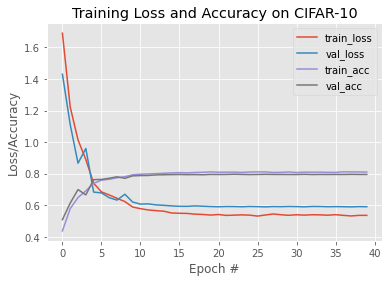

In [7]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on CIFAR-10")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()